In [22]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

%matplotlib inline
from DAG_generation import *

In [27]:
def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix > 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    
    nx.draw(gr)
    plt.show()


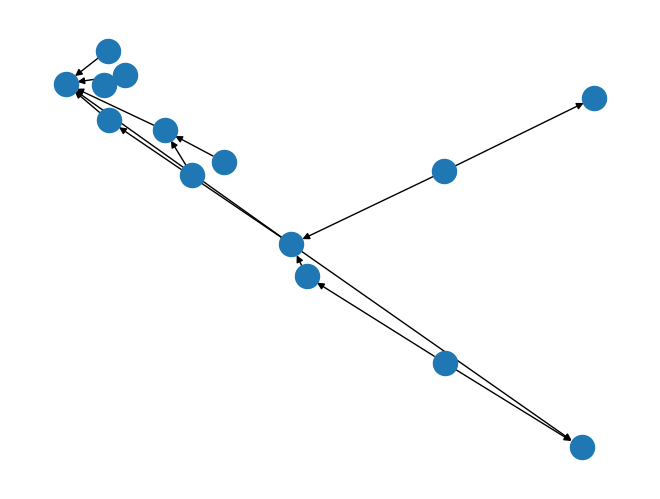

In [32]:
W_est = np.loadtxt('W_est.csv', delimiter=',')
show_graph_with_labels(W_est)


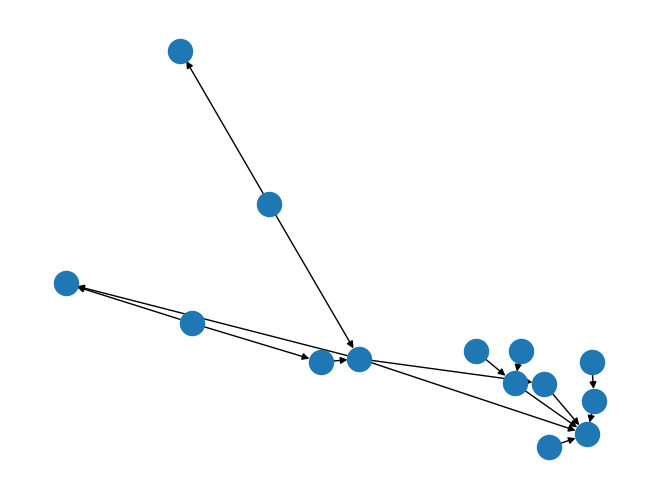

In [33]:
W_true = np.loadtxt('W_true.csv', delimiter=',')
show_graph_with_labels(W_true)

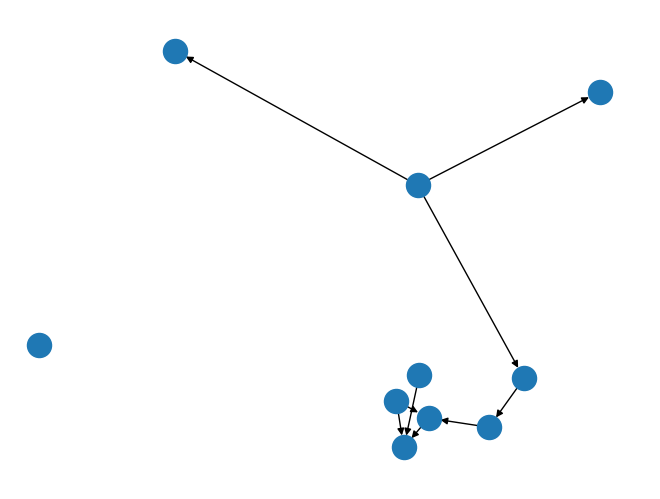

In [2]:
d = 10
prob = 0.1
w_range = (0.1, 0.4)
g_fu, adj = random_dag_generation(d, prob, 'er')

nx.draw(g_fu)

In [3]:
nx.get_edge_attributes(g_fu,'weight')

{(1, 0): 1.0,
 (3, 1): 1.0,
 (5, 0): 1.0,
 (7, 0): 1.0,
 (7, 1): 1.0,
 (8, 3): 1.0,
 (9, 4): 1.0,
 (9, 6): 1.0,
 (9, 8): 1.0}

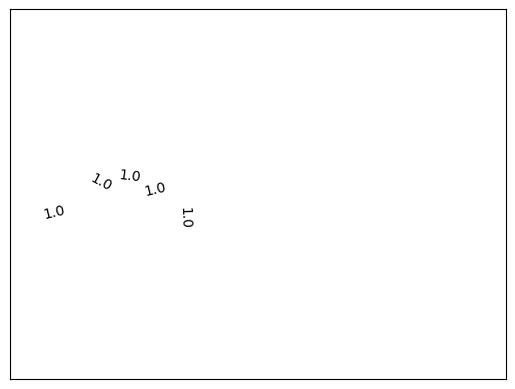

{(1, 0): Text(0.29234467593235486, 0.5147840458052844, '1.0'),
 (3, 1): Text(0.09001662116587132, 0.45064091278717866, '1.0'),
 (5, 0): Text(0.35335685319476906, 0.4367706468884356, '1.0'),
 (7, 0): Text(0.24243835662626123, 0.5506049257637871, '1.0'),
 (7, 1): Text(0.18363686203538612, 0.5319471517423786, '1.0'),
 (8, 3): Text(-0.2060112614905342, 0.32215615081882143, '1.0'),
 (9, 4): Text(0.29921314896668116, -0.5644917479749938, '1.0'),
 (9, 6): Text(-0.13545768951197404, -0.7073869776532739, '1.0'),
 (9, 8): Text(-0.1845183787913376, -0.09772388307091723, '1.0')}

In [4]:
visualize_graph(g_fu)

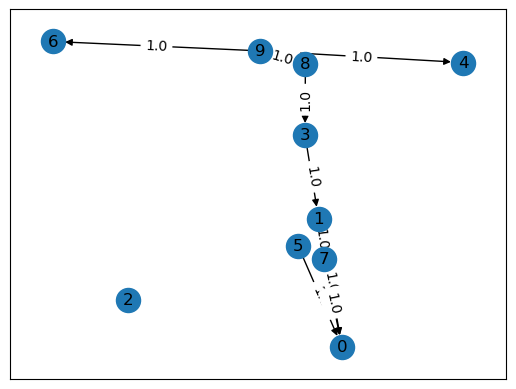

In [5]:
# random permutation
# P = np.random.permutation(np.eye(d, d))  # permutes first axis only
# B_perm = P.T.dot(adj).dot(P)

# B_perm
# U = np.random.uniform(low=w_range[0], high=w_range[1], size=[d, d])
# U[np.random.rand(d, d) < 0.5] *= -1
# W = (B_perm != 0).astype(float) * U
# G = nx.DiGraph(W)
G = g_fu

pos = nx.spring_layout(G)


nx.draw_networkx(G, pos)

edge_labels = nx.get_edge_attributes(G,'weight') # key is edge, pls check for your case

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [8]:
simulate_variable(g_fu, 50, '').shape

(50, 10)